## Wel-Come to Marketing Analytics
##               For
## E-Commerce Market Place Company

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing files
Customers=pd.read_csv('CUSTOMERS.csv')
Sellers=pd.read_csv('SELLERS.csv')
Products=pd.read_csv('PRODUCTS.csv')
Orders=pd.read_csv('ORDERS.csv')
Order_Items=pd.read_csv('ORDER_ITEMS.csv')
Order_Payments=pd.read_csv('ORDER_PAYMENTS.csv')
Order_Review_Ratings=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
Geo_Location=pd.read_csv('GEO_LOCATION.csv')

In [4]:
Customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh


In [5]:
Sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh


In [6]:
Products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [7]:
Orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00


In [8]:
Order_Items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29


In [9]:
Order_Payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [10]:
Order_Review_Ratings.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46


In [11]:
Geo_Location.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh


### 1. Perform Detailed exploratory analysis
    a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
    products, Total categories, Total sellers, Total locations, Total channels, Total
    payment methods etc…) 

In [12]:
#Total Revenue
print('Total Revenue=',Order_Items.price.sum().round())

#Total quantity
print('Total quantity=',Order_Items.shape[0])

#Total products
print('Total products=',Products.product_id.nunique())

#Total categories
print('Total categories=',Products.product_category_name.nunique())

#Total sellers
print('Total sellers=',Sellers.seller_id.nunique())

#Total locations
print('Total locations=',Geo_Location.geolocation_zip_code_prefix.nunique())

#Total payment methods
print('Total payment methods=',Order_Payments.payment_type.nunique())


Total Revenue= 13591644.0
Total quantity= 112650
Total products= 32951
Total categories= 71
Total sellers= 3095
Total locations= 19015
Total payment methods= 5


#### b. Understanding how many new customers acquired every month

In [13]:
Orders['order_purchase_timestamp'] = pd.to_datetime(Orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')
Orders['Year_month'] = Orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

cust_orders = pd.merge(Customers , Orders , how ='left' , on='customer_id')
cust_month = cust_orders.loc[:, ['customer_unique_id', 'Year_month']] 
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)
new_cust_monthly = cust_month.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly.head(2)

,customer_unique_id
Year_month,
2016-09,4
2016-10,315


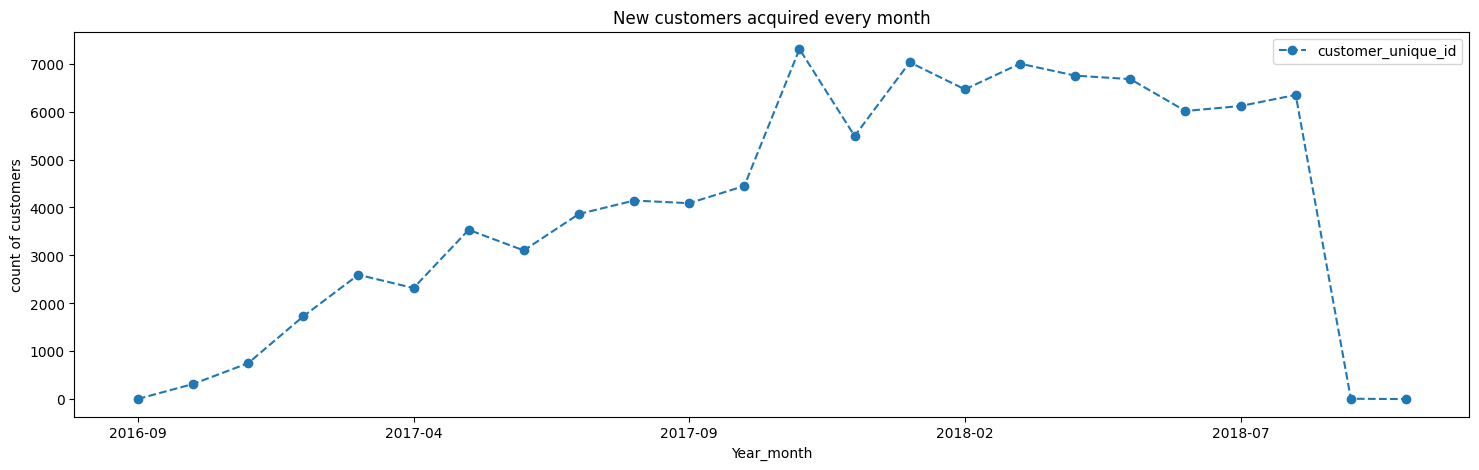

In [14]:
new_cust_monthly.plot( kind = 'line', figsize = (18,5),linestyle='--',marker='o')
plt.ylabel('count of customers')
plt.title('New customers acquired every month')
plt.show()

#### c. Understand the retention of customers on month on month basis

In [15]:
cust_monthly_cnt = cust_orders.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt.head(2)

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,324


In [16]:
cust_monthly_cnt.customer_unique_id.sum()

99441

In [17]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4
1,2016-10,315,324


In [18]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_y - retented_cust_monthly.customer_unique_id_x
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4,0
1,2016-10,315,324,9


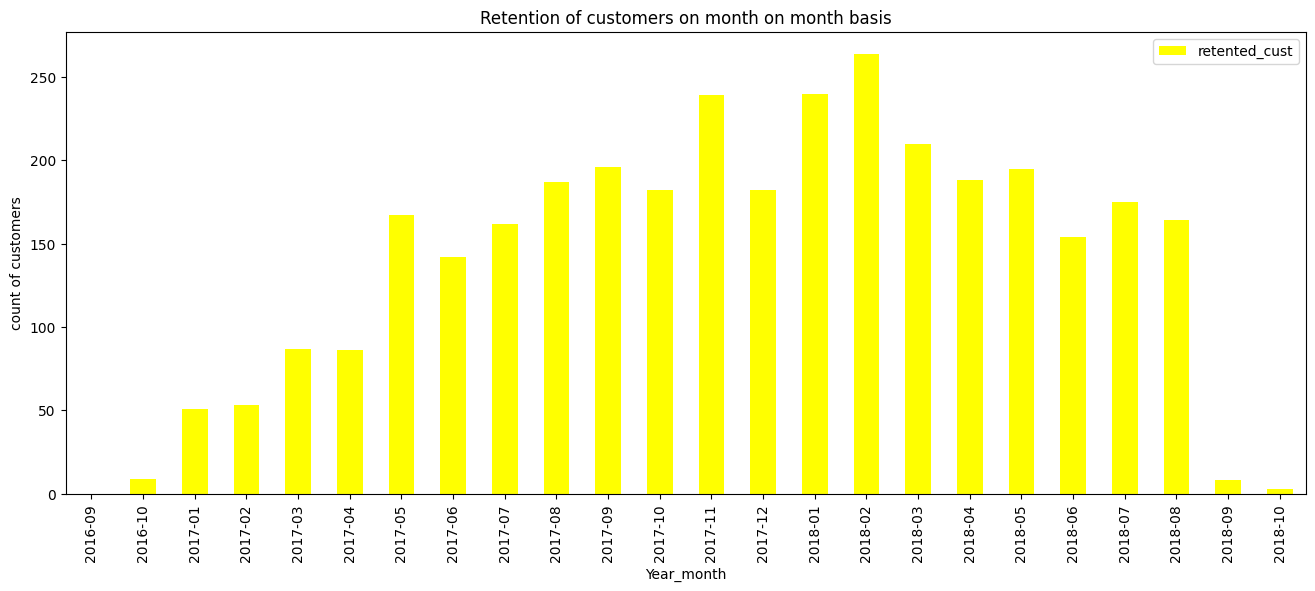

In [19]:
retented_cust_monthly.plot(kind= 'bar', x= 'Year_month' , y = 'retented_cust' , figsize = (16,6),color='yellow')
plt.ylabel('count of customers')
plt.title('Retention of customers on month on month basis')
plt.show()

#### d. How the revenues from existing/new customers on month on month basis

In [104]:
import pandas as pd
orders_items_prod['order_purchase_timestamp'] = pd.to_datetime(orders_items_prod['order_purchase_timestamp'])

orders_items_prod['year_month'] = orders_items_prod['order_purchase_timestamp'].dt.to_period('M')
monthly_min_transaction = orders_items_prod.groupby(['customer_id', 'year_month'])['order_purchase_timestamp'].min().reset_index()
monthly_min_transaction.columns = ['customer_id', 'year_month', 'min_monthly_transaction_date']

overall_min_transaction = orders_items_prod.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
overall_min_transaction.columns = ['customer_id', 'min_transaction_date']

merged_transactions = pd.merge(monthly_min_transaction, overall_min_transaction, on='customer_id')

merged_transactions['customer_type'] = merged_transactions.apply(
    lambda row: 'NEW' if row['min_monthly_transaction_date'] == row['min_transaction_date'] else 'EXISTING', axis=1)

merged_transactions


,customer_id,year_month,min_monthly_transaction_date,min_transaction_date,customer_type
0,00012a2ce6f8dcda20d059ce98491703,2017-11,2017-11-14 16:08:00,2017-11-14 16:08:00,NEW
1,000161a058600d5901f007fab4c27140,2017-07,2017-07-16 09:40:00,2017-07-16 09:40:00,NEW
2,0001fd6190edaaf884bcaf3d49edf079,2017-02,2017-02-28 11:06:00,2017-02-28 11:06:00,NEW
3,0002414f95344307404f0ace7a26f1d5,2017-08,2017-08-16 13:09:00,2017-08-16 13:09:00,NEW
4,000379cdec625522490c315e70c7a9fb,2018-04,2018-04-02 13:42:00,2018-04-02 13:42:00,NEW
...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03,2018-03-17 00:55:00,2018-03-17 00:55:00,NEW
98662,fffecc9f79fd8c764f843e9951b11341,2018-03,2018-03-29 16:59:00,2018-03-29 16:59:00,NEW
98663,fffeda5b6d849fbd39689bb92087f431,2018-05,2018-05-22 13:36:00,2018-05-22 13:36:00,NEW
98664,ffff42319e9b2d713724ae527742af25,2018-06,2018-06-13 16:57:00,2018-06-13 16:57:00,NEW


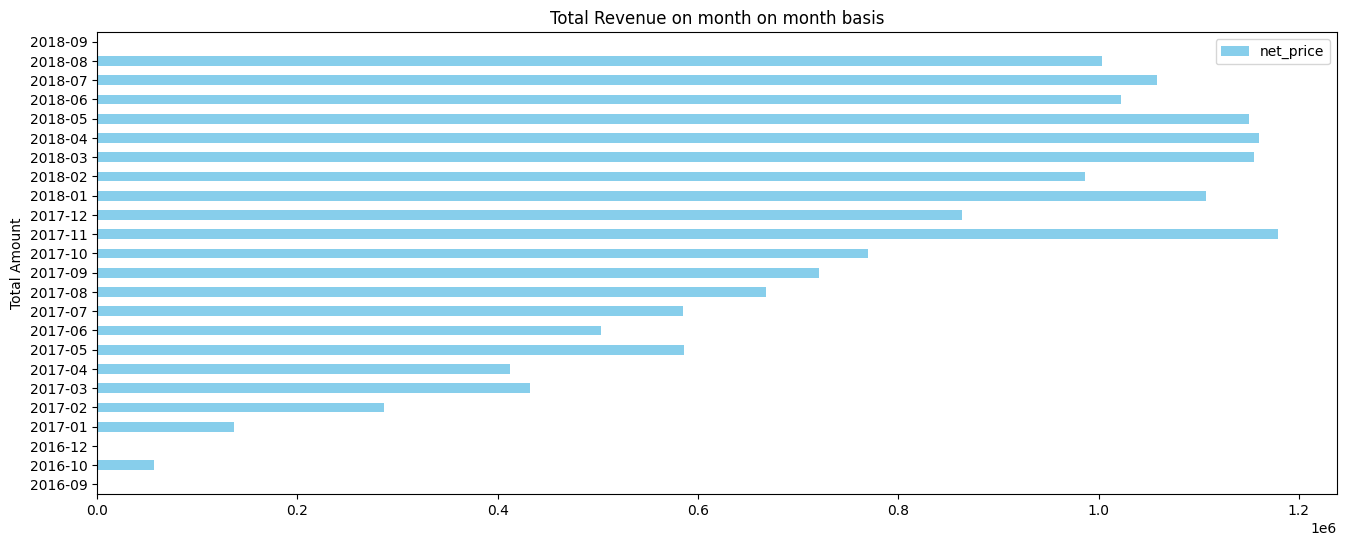

In [21]:
rev_mouth.plot( kind = 'barh', figsize =(16,6),color='skyblue')
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method 

In [22]:
orders_items_prod = pd.merge( order_item_month , Products , how ='left' , on = 'product_id')
orders_items_prod['month'] = orders_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%b"))
orders_items_prod.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,net_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,...,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,...,259.83,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Apr


In [23]:
# Seasonality of sales, quantity by category.
cat_qty_sales = orders_items_prod.groupby('product_category_name').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
cat_qty_sales

,product_category_name,quantity,sales
0,Agro_Industry_And_Commerce,212,72530.47
1,Air_Conditioning,297,55024.96
2,Art,209,24202.64
3,Arts_And_Craftmanship,24,1814.01
4,Audio,364,50688.50
...,...,...,...
66,Stationery,2517,230943.23
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4545,323667.53
69,Toys,4117,483946.60


In [24]:
# Seasonality of sales, quantity by Month.
month_qty_sales = orders_items_prod.groupby('month').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
month_qty_sales

,month,quantity,sales
0,Apr,10659,1356574.98
1,Aug,12158,1428658.01
2,Dec,6309,743925.07
3,Feb,9623,1091481.73
4,Jan,9163,1070343.23
5,Jul,11611,1393538.70
6,Jun,10661,1298162.91
7,Mar,11217,1357557.74
8,May,12061,1502588.82
9,Nov,8665,1010271.37


#### f. Popular Products by seller, state, category

In [25]:
# Popular product by sellers 

prod_seller = orders_items_prod.groupby(['seller_id','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_seller= prod_seller.sort_values(by=['seller_id','count']).drop_duplicates(subset='seller_id' ,keep='last')
prod_seller

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34397,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34402,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34430,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [26]:
# Popular product by category
prod_cat = orders_items_prod.groupby(['product_category_name','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_cat= prod_cat.sort_values(by=['product_category_name','count']).drop_duplicates(subset='product_category_name' ,keep='last')
prod_cat

,product_category_name,product_id,count
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,107
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,48
...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,84
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,33
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,93
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,99


In [27]:
# Popular category by month
cat_month = orders_items_prod.groupby(['month','product_category_name']).agg({'product_category_name':'count'}).rename(columns={'product_category_name':'count'}).reset_index()
cat_month= cat_month.sort_values(by=['month','count']).drop_duplicates(subset='month' ,keep='last')
cat_month

,month,product_category_name,count
7,Apr,Bed_Bath_Table,1020
111,Aug,Health_Beauty,1209
144,Dec,Bed_Bath_Table,552
213,Feb,Computers_Accessories,1087
270,Jan,Bed_Bath_Table,896
339,Jul,Bed_Bath_Table,1203
407,Jun,Bed_Bath_Table,1155
473,Mar,Bed_Bath_Table,1087
541,May,Bed_Bath_Table,1116
608,Nov,Bed_Bath_Table,975


#### h. List top 10 most expensive products sorted by price

In [28]:
print('Top 10 most expensive products sorted by price :')
Order_Items.loc[:, ['product_id','price']].drop_duplicates(subset='product_id' ).sort_values(by='price',ascending = False).head(10)

Top 10 most expensive products sorted by price :


,product_id,price
3556,489ae2aa008f021502940f251d4cce7f,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,4690.00
62086,259037a6a41845e455183f89c5035f18,4590.00
29193,a1beef8f3992dbd4cd8726796aa69c53,4399.87
45843,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
59137,6902c1962dd19d540807d0ab8fade5c6,3999.90
56663,4ca7b91a31637bd24fb8e559d5e015e4,3999.00


In [64]:
orders_items_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,net_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,...,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,...,259.83,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Apr
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,...,216.87,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,Jan
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,...,25.78,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,Aug
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,...,218.04,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,Feb


#### 2. Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated


In [73]:
customer_revenue = orders_items_prod.groupby('customer_id')['net_price'].sum().reset_index()
customer_revenue.rename(columns={'net_price': 'total_revenue'}, inplace=True)
customer_revenue['decile'] = pd.qcut(customer_revenue['total_revenue'], 10, labels=False) + 1

customer_revenue



,customer_id,total_revenue,decile
0,00012a2ce6f8dcda20d059ce98491703,114.74,6
1,000161a058600d5901f007fab4c27140,67.41,3
2,0001fd6190edaaf884bcaf3d49edf079,195.42,8
3,0002414f95344307404f0ace7a26f1d5,179.35,8
4,000379cdec625522490c315e70c7a9fb,107.01,6
...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,5
98662,fffecc9f79fd8c764f843e9951b11341,81.36,4
98663,fffeda5b6d849fbd39689bb92087f431,63.13,3
98664,ffff42319e9b2d713724ae527742af25,214.13,9


#### b. Divide the sellers into groups based on the revenue generated

In [65]:
seller_revenue = orders_items_prod.groupby('seller_id')['price'].sum().reset_index()
seller_revenue.rename(columns={'price': 'total_revenue'}, inplace=True)
seller_revenue['decile'] = pd.qcut(seller_revenue['total_revenue'], 10, labels=False) + 1
seller_revenue.head()


,seller_id,total_revenue,decile
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,8
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,10
2,001e6ad469a905060d959994f1b41e4f,250.00,3
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,6
4,003554e2dce176b5555353e4f3555ac8,120.00,2


#### 3. Cross-Selling (Which products are selling together)

In [78]:
order_products = orders_items_prod.groupby('order_id')['product_id'].apply(list).reset_index()

from itertools import combinations
from collections import Counter

def generate_combinations(products, n):
    return [tuple(sorted(combo)) for combo in combinations(products, n)]

all_combinations = []
for products in order_products['product_id']:
    if len(products) > 1:
        all_combinations.extend(generate_combinations(products, 2))
        if len(products) > 2:
            all_combinations.extend(generate_combinations(products, 3))
combination_counts = Counter(all_combinations)
top_10_combinations = combination_counts.most_common(10)
#print(top_10_combinations)
top_10_combinations

[(('ee3d532c8a438679776d222e997606b3',
   'ee3d532c8a438679776d222e997606b3',
   'ee3d532c8a438679776d222e997606b3'),
  1140),
 (('9571759451b1d780ee7c15012ea109d4',
   '9571759451b1d780ee7c15012ea109d4',
   '9571759451b1d780ee7c15012ea109d4'),
  1140),
 (('422879e10f46682990de24d770e7f83d',
   '422879e10f46682990de24d770e7f83d',
   '422879e10f46682990de24d770e7f83d'),
  476),
 (('89b190a046022486c635022524a974a8',
   '89b190a046022486c635022524a974a8',
   '89b190a046022486c635022524a974a8'),
  465),
 (('37eb69aca8718e843d897aa7b82f462d',
   '37eb69aca8718e843d897aa7b82f462d',
   '37eb69aca8718e843d897aa7b82f462d'),
  455),
 (('05b515fdc76e888aada3c6d66c201dff',
   '05b515fdc76e888aada3c6d66c201dff',
   '270516a3f41dc035aa87d220228f844c'),
  450),
 (('05b515fdc76e888aada3c6d66c201dff',
   '270516a3f41dc035aa87d220228f844c',
   '270516a3f41dc035aa87d220228f844c'),
  450),
 (('44a5d24dd383324a421569ca697b13c2',
   '44a5d24dd383324a421569ca697b13c2',
   '44a5d24dd383324a421569ca697b13c2')

In [50]:
from itertools import combinations
from collections import Counter

combo_counts = Counter()

for transaction_id, group in orders_items_prod.groupby('order_id'):
    products_in_transaction = group['product_id'].tolist()
    for i in range(2, 4):
        for combination in combinations(products_in_transaction, i):
            combo_counts[combination] += 1

top_10_combo = combo_counts.most_common(10)

print("Top 10 Combinations of Products Selling Together:")
for combination, count in top_10_combo:
    print(f"Combination: {combination}, Count: {count}")



Top 10 Combinations of Products Selling Together:
Combination: ('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3'), Count: 1140
Combination: ('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4'), Count: 1140
Combination: ('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d'), Count: 476
Combination: ('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8'), Count: 465
Combination: ('37eb69aca8718e843d897aa7b82f462d', '37eb69aca8718e843d897aa7b82f462d', '37eb69aca8718e843d897aa7b82f462d'), Count: 455
Combination: ('05b515fdc76e888aada3c6d66c201dff', '05b515fdc76e888aada3c6d66c201dff', '270516a3f41dc035aa87d220228f844c'), Count: 405
Combination: ('44a5d24dd383324a421569ca697b13c2', '44a5d24dd383324a421569ca697b13c2', '44a5d24dd383324a421569ca697b13c2'), Count: 364
Combinatio

#### 4. Payment Behaviour
#### a. How customers are paying?¶

In [32]:
payment_types = Order_Payments.payment_type.drop_duplicates().reset_index().drop(columns = 'index')

print('Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.')
payment_types

Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.


,payment_type
0,credit_card
1,UPI
2,voucher
3,debit_card
4,not_defined


#### b. Which payment channels are used by most customers?

In [33]:
payment_chnnl = Order_Payments.groupby('payment_type')[['payment_type']].count()
payment_chnnl = payment_chnnl.rename( columns={'payment_type':'No_of_transaction'}).sort_values(by='No_of_transaction',ascending = False).reset_index()
print('For the payments, Credit card and UPI are used by most of the customers')
payment_chnnl

For the payments, Credit card and UPI are used by most of the customers


,payment_type,No_of_transaction
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


#### 5. Customer satisfaction towards category & product
#### a. Which categories (top 10) are maximum rated & minimum rated?

In [34]:
orders_items_prod_review = pd.merge(orders_items_prod, Order_Review_Ratings ,how= 'left', on = 'order_id')
category_review = orders_items_prod_review.groupby('product_category_name')['review_score'].sum().reset_index()
max_rate_cat = category_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top ten maximum rated product categories :')
max_rate_cat

Top ten maximum rated product categories :


,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40121
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


In [35]:
min_rate_cat = category_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top ten minimum rated product categories :')
min_rate_cat

Top ten minimum rated product categories :


,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,145


### b. Which products (top10) are maximum rated & minimum rated?

In [36]:
orders_items_prod_review = pd.merge(orders_items_prod, Order_Review_Ratings ,how= 'left', on = 'order_id')
Product_review = orders_items_prod_review.groupby('product_id')['review_score'].sum().reset_index()
max_rate_prod = Product_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top ten maximum rated product :')
max_rate_prod

Top ten maximum rated product :


,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2112
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1896
3,389d119b48cf3043d311335e499d9c6b,1612
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1432
7,53b36df67ebb7c41585e8d54d6772e08,1348
8,154e7e31ebfa092203795c972e5804a6,1264
9,3dd2a17168ec895c781a9191c1e95ad7,1147


In [37]:
min_rate_prods = Product_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top ten minimum rated product categories :')
min_rate_prods

Top ten minimum rated product categories :


,product_id,review_score
0,e03071a2d2410c9ef2be47b508cac95f,1
1,b56ff361e0733eebc1d010432936b706,1
2,7ed8c74b7ad2f1790a24a24c071da537,1
3,43c81702c9aca96af077286a5b2525b9,1
4,1da4613d4f7e10e1554538b46dd16486,1
5,ed9d81a5043f74cbe0e3db315770af45,1
6,5096e827f6152df3974343e735a52dc9,1
7,1da0fbb35cfdc9fcb6d48dfddca69513,1
8,1d9c9e0532fb481c0f89c3b20cec62e6,1
9,8ec6aedf40e1175c5446134c40931706,1


#### c. Average rating by location, seller, month etc.


In [38]:
order_review_ratings2 = pd.merge(Orders, Order_Review_Ratings, on='order_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, Customers, on='customer_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, Order_Items, on='order_id' , how='left')
order_review_ratings2.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,review_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,a54f0611adc9ed256b57ede6b6eb5114,...,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,8d5266042046a06655c8db133d120ba5,...,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76


In [39]:
# Average rating by location
avg_rating_location = order_review_ratings2.groupby('customer_state')['review_score'].mean().reset_index()
avg_rating_location.rename(columns={'customer_state':'Location', 'review_score':'Avg_review'}, inplace =True)
avg_rating_location

,Location,Avg_review
0,Andhra Pradesh,3.980414
1,Arunachal Pradesh,4.024219
2,Chhattisgarh,4.015419
3,Delhi,4.023483
4,Goa,4.800000
5,Gujarat,4.018021
6,Haryana,4.080142
7,Himachal Pradesh,3.984706
8,Jammu & Kashmir,4.006211
9,Karnataka,3.996825


In [40]:
# Average rating by seller
avg_rating_seller = order_review_ratings2.groupby('seller_id')['review_score'].mean().reset_index()
avg_rating_seller.rename(columns={'review_score':'Avg_review'}, inplace =True)
avg_rating_seller

,seller_id,Avg_review
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.885246


In [41]:
# Average rating by month and year
avg_rating_month = order_review_ratings2.groupby('Year_month')['review_score'].mean().reset_index()
avg_rating_month.rename(columns={'review_score':'Avg_review'}, inplace =True)
avg_rating_month

,Year_month,Avg_review
0,2016-09,1.000000
1,2016-10,3.463542
2,2016-12,5.000000
3,2017-01,4.033777
4,2017-02,3.986063
5,2017-03,4.011434
6,2017-04,3.980044
7,2017-05,4.097347
8,2017-06,4.100082
9,2017-07,4.096711
